# Deep Learning

Deep learning is the most exciting field right now being explored a lot in ML

In case of an image, every image will have a bunch of features - in this case keywords that are associated with that image. We can use that to relate these images together.

Images Features might not be non-linear. Similar to linear classification, here also we have decision boundaries represented in the form of neural networks. 

Neural networks or trees with X - entry nodes , and Y - result and the node-path would be the weight. Can be represented in the form of XOR / XNOR and we can introduce hidden layers to represent multi-level paths to resultant Y.

**Interest Points** or local features (acting as local detectors) - These are the features in an images just like features in a data set. Hand crafted features are fed to multiple detectors and then which in turn combines into another detection network to determine the end-classification state. eg: SIFT (hardcoded features; not adaptable). The hardcoded features were then turned to vectors which were then fed to simple classifiers like SVM or logistic classification --> Problem was it was manual.

Neural networks have multiple hidden layers starting with the entry layer. Each layer understands / detects and classifies different patterns more complex as we proceed. For eg., Outer layer can detect different lines and angles. Second layer can detect the plain surface or edges or shapes. Third layer can detect complex objects and so on. This is then fed to the final classifier.

*Deep learning was shown a lot of interest in Computer Vision area.* More interests like German Traffic sign recognition, Google House Number recognition saw use of Deep learning. ImageNet - 2012 competition was the turning point where the winner (SuperVision) team had a 10% better accuracy over his next runner up. They used multiple layers (9) of neural network with 4MM features. This was made possible by new learning algorithms and a GPU implementation.

Check out [PhotoTag by Dato](http://phototag.herokuapp.com/), a hosted service of ImageNet ML model

Other Usecases:
- Scene parsing/understanding - trying to identify the different parts of the image like building, roads etc...
- Retrieval of similar images as in our demo like similar dresses

**Pros:**
 - Enables learning of features rather than hardcoding them
 - Impressive performance gains in Computer Vision, NLP, text analysis
 - Potential for more impact
 
**Cons:**
 - Lots of data is needed which has to be labelled with human annotations
 - Computationally very expensive
 - Hard to tune - Choice of architecture, hyperparameters, parameter types, learning algorithm

**Deep Features** allows you to train neural networks / learning algorithm with not too much of data. We use a neural network trained with large data set and high level of layers (8-9 hidden layers) and features (in the scale of 4MM). We then transfer the learned features to the new classifier which is a simple linear/logical classifier. i.e., Neural net is used for feature extraction- So **Transfer Learning** but the classifier is a simple classifier. 

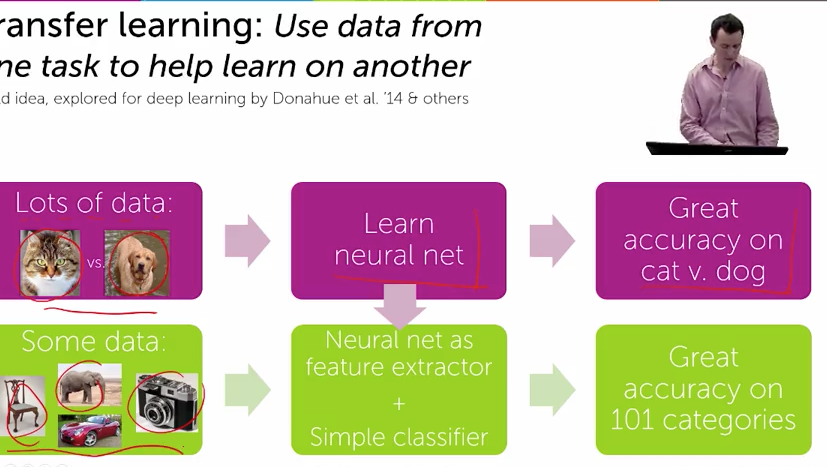

In [2]:
# Example block diagram to explain transfer learning
from IPython.display import Image
Image('images/transfer_learning.png')

We can remove the last layer or last few layers of Neural network which was specific to identify the data set at hand. We can use the remaining of layers of neural network which is pretty generic with fixed weights and then tie it to a simple classifier.

The example dress demo was built like this. We can then use our not so big data set to fed into this stripped down neural network to extract features which is then split to training and test data set and trained with simple classifiers.

**How generic are these deep features?**

**Compology** - a waste management company used existing deep features with few labelled human marked data set to predict what happens in their trash and effectively manage them

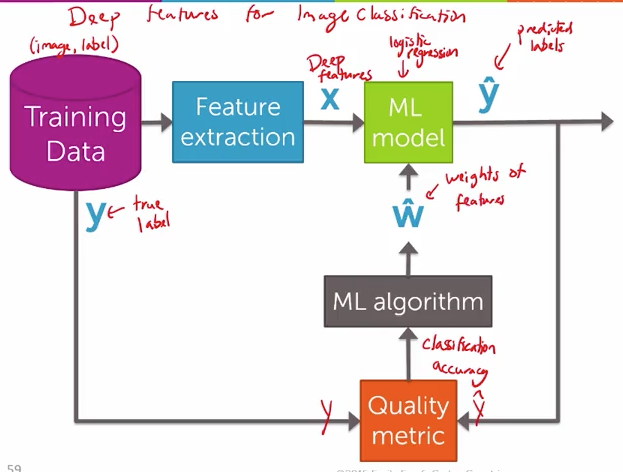

In [3]:
# Deep Learning block diagram
Image('images/deep_learning_block_dgm.png')

Today, I sort of had a *epiphany* which technically I should have had a long time ago. Note the ML model and ML algorithm - two blocks. So, essentially,

Quality Metric (RSS, RMSE, TF-IDF, Confusion matrix) + ML algorithm forms our **Learning algorithm**. <br/>
ML model forms our models like SVM, Logistic regression which assigns weights using this learning algorithm and predicts y_hats.



Let's start some hands on lessons now.
**Hands on**

In [2]:
import graphlab as ga

A newer version of GraphLab Create (v1.10.1) is available! Your current version is v1.10.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [3]:
# Load a common image analysis dataset
image_train = ga.SFrame('image_train_data/')
image_test = ga.SFrame('image_test_data/')

This non-commercial license of GraphLab Create is assigned to sugavaneshb@gmail.com and will expire on May 15, 2017. For commercial licensing options, visit https://dato.com/buy/.


[INFO] graphlab.cython.cy_server: GraphLab Create v1.10 started. Logging: /tmp/graphlab_server_1465504145.log


In [4]:
# Exploring the image data
ga.canvas.set_target('ipynb')

In [5]:
image_train['image'].show()

In [6]:
# Train a classifier on the data
raw_pixel_model = ga.logistic_classifier.create(image_train, target='label', features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 1893

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients    : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 6        | 0.000006  | 3.262233     | 0.269414          | 0.196429            |

| 2         | 8        | 1.000000  | 4.675441     | 0.354992          | 0.267857            |

| 3         | 9        | 1.000000  | 5.224448     | 0.390914          | 0.348214            |

| 4         | 10       | 1.000000  | 5.698907     | 0.448494          | 0.419643            |

| 5         | 11       | 1.000000  | 6.153096     | 0.397781          | 0.339286            |

| 6         | 13       | 1.000000  | 6.912843     | 0.449023          | 0.410714            |

| 10        | 18       | 1.000000  | 9.138457     | 0.478077          | 0.428571            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [7]:
# Evaluation of the simple classifier model 
# Performing prediction on this simple classifer model
image_test[0:3]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.13469004631, 0.0, 0.0,0.0, 0.0366497635841, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.23135882616, 0.0, 0.0,0.0, 0.0, 0.226023137 ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.0344192385674, 0.0, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."


In [10]:
image_test[0:3].show()

In [11]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'dog', 'bird']

**Boy! It got all wrong!**

In [8]:
# Evaluating using test_data
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.44575, 'auc': 0.6912687500000003, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  automobile  |       cat       |  198  |
 |     bird     |       bird      |  330  |
 |  automobile  |       bird      |   48  |
 |     cat      |       dog       |  290  |
 |     dog      |       dog       |  424  |
 |     bird     |    automobile   |  146  |
 |  automobile  |    automobile   |  613  |
 |     dog      |    automobile   |  107  |
 |     bird     |       cat       |  325  |
 |     cat      |    automobile   |  156  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.44591527881695575, 'log_loss': 1.2641008687384427, 'precision': 

In [13]:
# Can we improve the model using deep features
# Now we used simple features present in image_array. Why not deep features using transfer learning?
# Checking out our given data set
len(image_train)

2005

In [16]:
# My original line was,
# deep_learning_model = ga.load_model('imagenet_model')
# Nope this is not locally available. So, getting it from S3
deep_learning_model = ga.load_model('http://s3.amazonaws.com/GraphLab-Datasets/deeplearning/imagenet_model_iter45')

In [ ]:
# This is performing the transfer learning by extracting the features and load the image training data
image_train['deep_features'] = deep_learning_model.extract_features(image_train)

Images being resized.

In [9]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [10]:
# Apparently the deep features are already saved to the model
deep_features_model = ga.logistic_classifier.create(image_train, target="label", features=["deep_features"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

WARNING: Detected extremely low variance for feature(s) 'deep_features' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 1927

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients    : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 5        | 0.000130  | 3.124654     | 0.762325          | 0.692308            |

| 2         | 9        | 0.250000  | 5.362812     | 0.773742          | 0.717949            |

| 3         | 10       | 0.250000  | 6.163810     | 0.777893          | 0.730769            |

| 4         | 11       | 0.250000  | 7.102397     | 0.789310          | 0.743590            |

| 5         | 12       | 0.250000  | 7.858681     | 0.802283          | 0.756410            |

| 6         | 13       | 0.250000  | 8.593036     | 0.831863          | 0.717949            |

| 7         | 14       | 0.250000  | 9.357359     | 0.837571          | 0.717949            |

| 8         | 15       | 0.250000  | 10.087435    | 0.843280          | 0.730769            |

| 9         | 16       | 0.250000  | 11.048738    | 0.860405          | 0.730769            |

| 10        | 17       | 0.250000  | 11.898525    | 0.875454          | 0.730769            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [11]:
# First let's do some application and prediction
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

## Compute test_data accuracy with deep_features

In [12]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.78175, 'auc': 0.9403346666666687, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  automobile  |       cat       |   12  |
 |     bird     |       dog       |   66  |
 |     cat      |       bird      |   69  |
 |  automobile  |       dog       |   8   |
 |     cat      |    automobile   |   41  |
 |     dog      |       bird      |   39  |
 |     bird     |       cat       |  119  |
 |     dog      |    automobile   |   19  |
 |     dog      |       dog       |  736  |
 |     cat      |       dog       |  247  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7813700729977628, 'log_loss': 0.574065622403619, 'precision': 0.

## Nearest Neighbour Hands on Exercises

In [13]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [14]:
# Train nearest neighbour model
knn_model = ga.nearest_neighbors.create(image_train, features=["deep_features"], label="id")

Starting brute force nearest neighbors model training.

In [15]:
# Use image retreival model with deep features to find similar images
cat = image_train[18:19]
cat['image'].show()

In [16]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 23.918ms     |

| Done         |         | 100         | 255.785ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.9403137951,2
0,39777,38.4634888975,3
0,36870,39.7559623119,4
0,41734,39.7866014148,5


In [17]:
image_train[384:385].show()

In [18]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'], 'id')

In [20]:
cat_neighbours = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 26.561ms     |

| Done         |         | 100         | 240.453ms    |

+--------------+---------+-------------+--------------+

In [21]:
cat_neighbours['image'].show()

In [22]:
car = image_train[8:9]
car['image'].show()
get_images_from_ids(knn_model.query(car))['image'].show()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 23.178ms     |

| Done         |         | 100         | 237.506ms    |

+--------------+---------+-------------+--------------+

In [23]:
show_neighbours = lambda i : get_images_from_ids(knn_model.query(image_train[i:i+1]))['image'].show()

In [24]:
show_neighbours[0]

TypeError: 'function' object has no attribute '__getitem__'

In [25]:
show_neighbours(0)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 20.791ms     |

| Done         |         | 100         | 275.565ms    |

+--------------+---------+-------------+--------------+

In [26]:
show_neighbours(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 25.919ms     |

| Done         |         | 100         | 255.698ms    |

+--------------+---------+-------------+--------------+

In [27]:
show_neighbours(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 15.133ms     |

| Done         |         | 100         | 275.419ms    |

+--------------+---------+-------------+--------------+

In [28]:
show_neighbours(2000)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 17.852ms     |

| Done         |         | 100         | 238.762ms    |

+--------------+---------+-------------+--------------+

## Quiz questions

In [29]:
#Q1 sketch_summary() method
image_train.sketch_summary('label')

AttributeError: 'SFrame' object has no attribute 'sketch_summary'

In [30]:
image_train['label'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+------------+-----+-----+------+
| value | automobile | cat | dog | bird |
+-------+------------+-----+-----+------+
| count |    509     | 509 | 509 | 478  |
+-------+------------+-----+-----+------+


In [31]:
image_train['label'].show()

In [32]:
image_train['label'].topk_index(topk=10, reverse=True)

dtype: int
Rows: 2005
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]

In [33]:
image_train['label'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+------------+-----+-----+------+
| value | automobile | cat | dog | bird |
+-------+------------+-----+-----+------+
| count |    509     | 509 | 509 | 478  |
+-------+------------+-----+-----+------+


In [34]:
509 + 509 + 509 + 478

2005

In [35]:
def filter_label(label):
    label_train = image_train[image_train['label'] == label]
    return label_train,ga.nearest_neighbors.create(label_train, features=['deep_features'], label='id')

In [36]:
cat_train, cat_knn_model = filter_label('cat')

Starting brute force nearest neighbors model training.

In [37]:
cat_knn_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 20.817ms     |

| Done         |         | 100         | 100.075ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.623719208,1
0,45646,36.0068799284,2
0,32139,36.5200813436,3
0,25713,36.7548502521,4
0,331,36.8731228168,5


In [38]:
cat_train[cat_train[id='16289']]['image'].show()

SyntaxError: invalid syntax (<ipython-input-38-9b0c722be7ff>, line 1)

In [43]:
image_train[image_train['id'] == 16289]['image'].show()

In [44]:
dog_train, dog_knn_model = filter_label('dog')

Starting brute force nearest neighbors model training.

In [45]:
dog_knn_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 22.238ms     |

| Done         |         | 100         | 104.916ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.4642628784,1
0,13387,37.5666832169,2
0,35867,37.6047267079,3
0,44603,37.7065585153,4
0,6094,38.5113254907,5


In [46]:
display_image = lambda i : image_train[image_train['id'] == i]['image'].show()

In [47]:
display_image(16976)

In [48]:
cat_knn_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 21.096ms     |

| Done         |         | 100         | 82.746ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [50]:
dog_knn_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 15.018ms     |

| Done         |         | 100         | 76.339ms     |

+--------------+---------+-------------+--------------+

37.77071136184156

In [51]:
automobile_train, automobile_model = filter_label('automobile')
bird_train, bird_model = filter_label('bird')
dog_model = dog_knn_model
cat_model = cat_knn_model

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

In [52]:
split_test_label = lambda i : image_test[image_test['label'] == i]
image_test_cat = split_test_label('cat')
image_test_dog = split_test_label('dog')
image_test_automobile = split_test_label('automobile')
image_test_bird = split_test_label('bird')

In [53]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 7668

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 381.413ms    |

| Done         | 509000  | 100         | 441.905ms    |

+--------------+---------+-------------+--------------+

In [54]:
dog_cat_neighbors

query_label,reference_label,distance,rank
0,33,36.4196077068,1
1,30606,38.8353268874,1
2,5545,36.9763410854,1
3,19631,34.5750072914,1
4,7493,34.778824791,1
5,47044,35.1171578292,1
6,13918,40.6095830913,1
7,10981,39.9036867306,1
8,45456,38.0674700168,1
9,44673,42.7258732951,1


In [55]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)
dog_bird_neighbors = bird_model.query(image_test_dog,k=1)

Starting blockwise querying.

max rows per data block: 7668

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 469.14ms     |

| Done         | 509000  | 100         | 516.715ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 7668

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 412.258ms    |

| Done         | 509000  | 100         | 450.336ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 7668

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 119000  | 24.8954     | 362.271ms    |

| Done         | 478000  | 100         | 427.109ms    |

+--------------+---------+-------------+--------------+

In [56]:
result_sframe = ga.SFrame({'dog-automobile': dog_automobile_neighbors['distance'], 
                           'dog-bird': dog_bird_neighbors['distance'],
                           'dog-cat': dog_cat_neighbors['distance'],
                           'dog-dog': dog_dog_neighbors['distance']})

In [57]:
result_sframe

dog-automobile,dog-bird,dog-cat,dog-dog
41.9579761457,41.7538647304,36.4196077068,33.4773590373
46.0021331807,41.3382958925,38.8353268874,32.8458495684
42.9462290692,38.6157590853,36.9763410854,35.0397073189
41.6866060048,37.0892269954,34.5750072914,33.9010327697
39.2269664935,38.272288694,34.778824791,37.4849250909
40.5845117698,39.1462089236,35.1171578292,34.945165344
45.1067352961,40.523040106,40.6095830913,39.0957278345
41.3221140974,38.1947918393,39.9036867306,37.7696131032
41.8244654995,40.1567131661,38.0674700168,35.1089144603
45.4976929401,45.5597962603,42.7258732951,43.2422832585


In [58]:
dog_distances = result_sframe

In [59]:
def is_dog_correct(row):
    return ((row['dog-dog'] < row['dog-cat']) and (row['dog-dog'] < row['dog-automobile']) 
            and (row['dog-dog'] < row['dog-bird']))
is_dog_correct(dog_distances[0])

True

In [60]:
accuracy = dog_distances.apply(is_dog_correct)

In [61]:
accuracy

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [62]:
accuracy.sum()

678

In [63]:
len(dog_distances)

1000